In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<H1>Przygotowanie zbioru danych: XOR<H1>

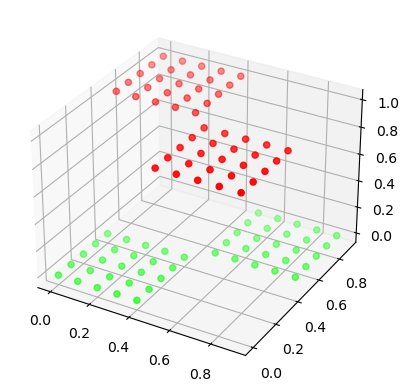

In [2]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

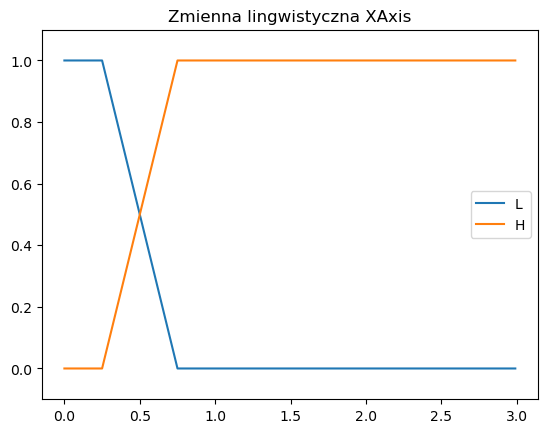

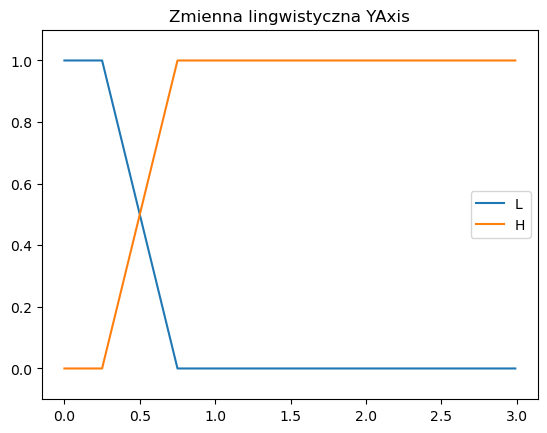

In [3]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.39199714 0.87812448 0.72491104]
 [0.70795902 0.20174503 0.04579493]
 [0.22357841 0.70028116 0.86464472]
 [0.78624665 0.50460465 0.38531941]]


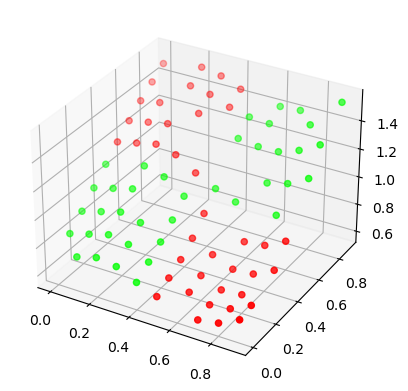

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

Optymalizacja zakończona!
z blędem:   1.7732141223942084e-07
Liczba ew:  35611
Liczba it:  50
TIME elapsed:  6.845999479293823


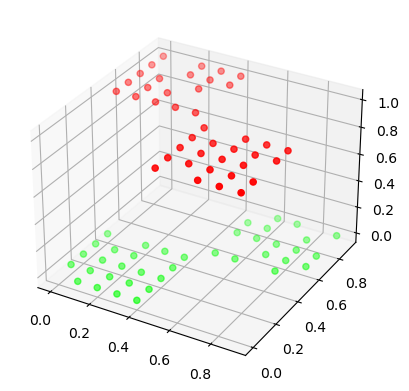

In [5]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

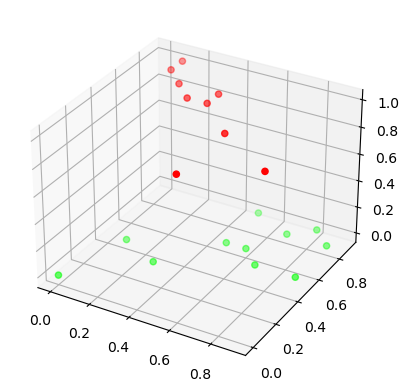

[[11  0]
 [ 0  9]]


In [6]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

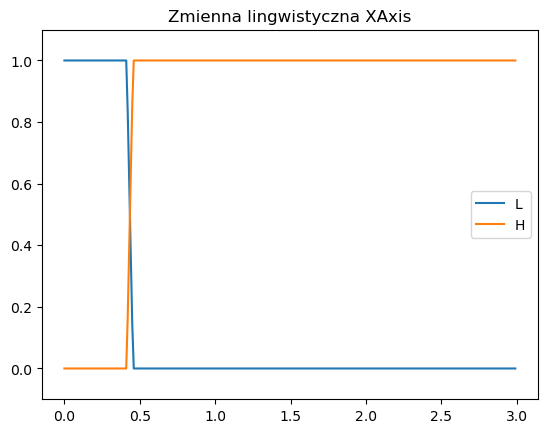

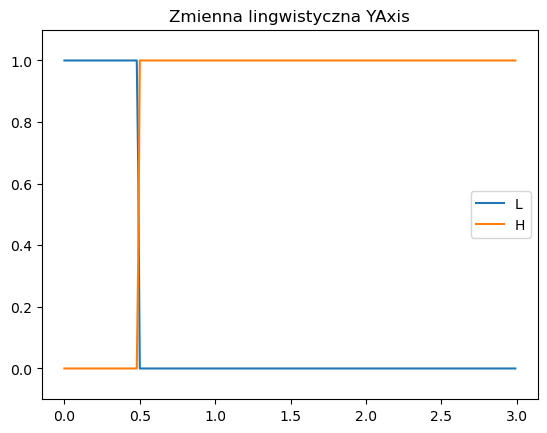

In [7]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [8]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[0.43446843, 0.04371163],
       [0.49194031, 0.01485582]]) 
Konkluzje:  array([[1.19716927e-12, 1.21758751e-12, 7.04189072e-12],
       [4.38320199e-15, 2.54096937e-14, 9.99999993e-01],
       [0.00000000e+00, 7.09427317e-14, 9.99999999e-01],
       [6.03315933e-12, 5.65682955e-12, 5.48752156e-12]])


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

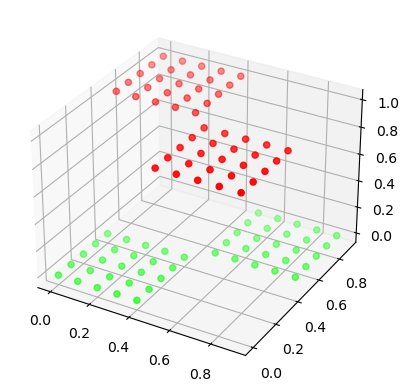

In [9]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

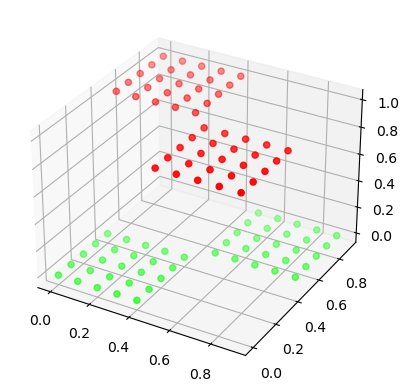

In [10]:
# fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

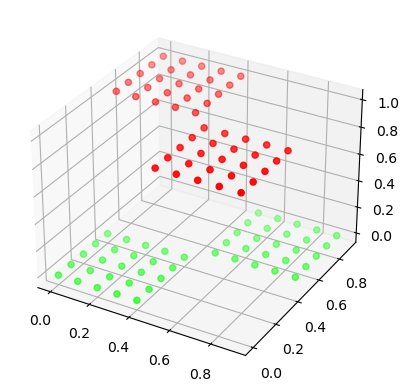

In [11]:
# fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [12]:
%matplotlib auto

Using matplotlib backend: <object object at 0x00000201714994B0>


In [13]:
%matplotlib inline

In [14]:
def train_multiplication_table(n=2):
    x = np.arange(1, n, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.multiply(np.round(dataX), np.round(dataY))

    mf1 = [[n+1, 0.25, 0.5, 0.5] for n in range(n)]
    labels = [str(n+1) for n in range(n)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", labels)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", labels)

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2)

    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    result = fis.train(True, True, False, True, n_iter=50)
    end = time.time()
    elapsed = end - start
    print("TIME elapsed: ", elapsed)

    fis.training_data = dataXY.T
    fis.expected_labels = data_labels
    fis.show_results()

    print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

    return result, elapsed

E:\!SIiUM2\MSI\ANFIS.py:90: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   2.4176671861130474
Liczba ew:  64833
Liczba it:  50
TIME elapsed:  13.085502862930298


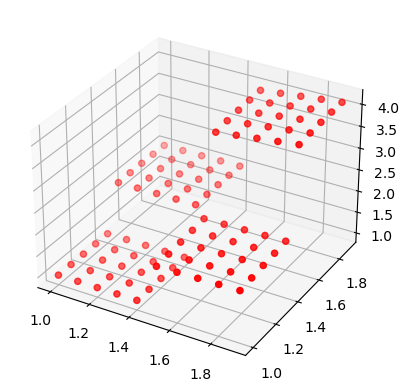

Parametry początkowe:
Przesłanki:  [[[1.43924849 1.1596682  0.27985252 1.87673773]
  [1.68340069 0.44752783 0.05598365 0.33341917]]

 [[1.87513382 1.9484431  0.16631755 1.35712125]
  [1.50547729 0.03205191 0.03753108 1.89731512]]] 
Konkluzje:  [[1.26628532e-10 1.74339858e-09 9.99999556e-01]
 [1.92340741e-01 5.76873653e-01 2.00000000e+00]
 [6.07780080e-02 6.13989763e-01 2.00000000e+00]
 [2.00000000e+00 2.00000000e+00 2.00000000e+00]]
Optymalizacja zakończona!
z blędem:   15.532219439060645
Liczba ew:  225834
Liczba it:  50
TIME elapsed:  70.00103116035461


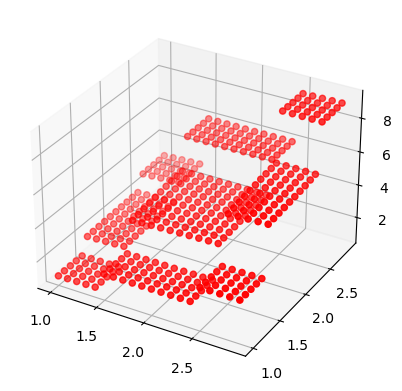

Parametry początkowe:
Przesłanki:  [[[8.76565193e-01 3.04697761e+00 4.61612887e-01 9.95834092e-02]
  [3.38809867e+00 4.72207182e-01 1.61020551e+00 2.55675012e+00]
  [1.48279654e+00 3.44431144e-02 6.54286330e-02 1.41089304e+00]]

 [[1.53403276e+00 1.73670947e+00 9.56229407e-01 9.79687613e-02]
  [2.71629849e+00 2.54732364e+00 4.20155273e-02 3.68683945e+00]
  [4.00000000e+00 5.05037598e-13 1.85779940e+00 1.05839787e+00]]] 
Konkluzje:  [[8.01161599e-02 1.08376525e-12 9.11822455e-01]
 [7.28349687e-01 2.97168245e-12 8.79711845e-01]
 [6.44648689e-01 3.49516002e-12 2.00000000e+00]
 [3.58490796e-01 2.87793035e-01 2.00000000e+00]
 [2.00000000e+00 6.08205791e-01 2.00000000e+00]
 [2.00000000e+00 1.95856789e+00 2.00000000e+00]
 [2.31654123e-12 8.29816389e-01 1.54014374e-13]
 [1.04211534e+00 1.19570356e+00 1.19323128e+00]
 [9.92739660e-04 1.62165111e+00 8.49204111e-13]]
Optymalizacja zakończona!
z blędem:   177.47042229645365
Liczba ew:  333830
Liczba it:  50
TIME elapsed:  164.71398448944092


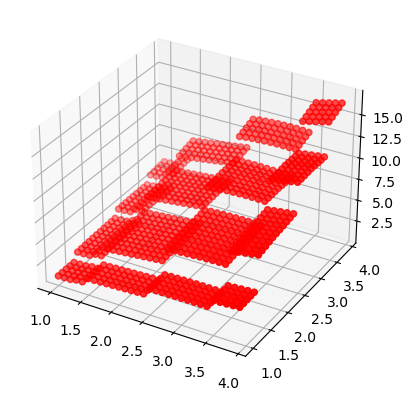

Parametry początkowe:
Przesłanki:  [[[2.03544587e+00 2.76221607e+00 1.66281838e+00 8.33916155e-02]
  [2.02039471e+00 1.07875053e+00 8.10191464e-02 1.34329733e+00]
  [9.06341164e-01 7.27223400e-01 8.95071833e-01 5.56562645e-14]
  [1.65094825e+00 1.51511572e+00 3.79889630e+00 9.04121712e-02]]

 [[1.63556521e-02 4.81108494e-01 1.44276098e+00 3.91908939e-14]
  [2.21142855e+00 1.56104668e+00 3.09018371e-02 1.71627429e+00]
  [1.30743059e+00 2.49219343e+00 1.45786178e+00 1.10010678e-14]
  [3.39671160e+00 4.81605530e-02 1.42873552e+00 6.98512987e-02]]] 
Konkluzje:  [[5.37191537e-01 4.27598394e-14 2.12887581e-14]
 [2.48187775e-01 1.02795040e-14 5.86633411e-01]
 [1.14802562e-01 2.58396337e-01 2.56999911e-15]
 [2.00000000e+00 1.51603977e+00 1.59917648e+00]
 [1.09922613e+00 1.36094441e+00 1.98421579e+00]
 [1.75349078e+00 1.99859890e+00 1.99668319e+00]
 [1.80818466e-01 3.16768282e-01 1.13320276e+00]
 [3.66795278e-01 1.29798052e-02 8.10454784e-01]
 [3.32629559e-01 4.67236852e-03 1.53328398e+00]
 [4.

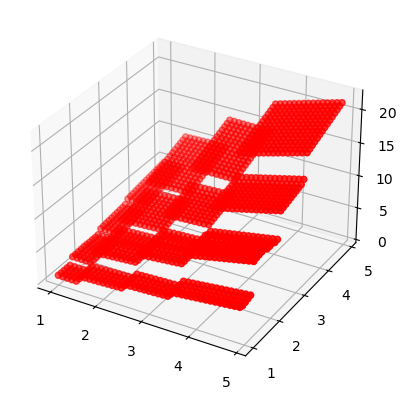

Parametry początkowe:
Przesłanki:  [[[0.46398748 0.40510751 0.69977667 0.71854873]
  [0.3873805  0.26698882 2.2171757  0.69209814]
  [3.19941899 1.40644028 0.0163832  2.24069585]
  [3.37519934 0.0788482  1.83577536 0.07244346]
  [0.72261766 1.34417011 0.0851587  0.10280544]]

 [[0.47513953 1.87734311 2.22119483 0.08129412]
  [3.03896446 1.8358589  0.04142872 2.76451863]
  [2.7968733  1.17245488 1.09472147 0.11690092]
  [2.32449453 0.17500986 0.24837728 0.0751071 ]
  [0.21736608 0.15794928 3.65033663 1.30903747]]] 
Konkluzje:  [[0.17940639 0.14942999 0.14838017]
 [0.24788299 0.24224622 0.23497001]
 [0.48629746 0.25554586 0.59197169]
 [0.101072   0.36542856 0.56127746]
 [0.17213163 0.14072276 0.20121673]
 [0.90942825 0.79454526 0.66873193]
 [0.47874389 0.77739157 0.51436908]
 [1.96343652 1.99209478 1.99999971]
 [0.20262265 1.685898   1.29609571]
 [0.59407294 0.75260706 0.32598187]
 [0.75325963 0.48918331 0.72900271]
 [0.6925022  0.46801305 0.65389108]
 [1.52516871 0.6104631  1.51318752]


In [15]:
times = [train_multiplication_table(n) for n in range(2, 6)]

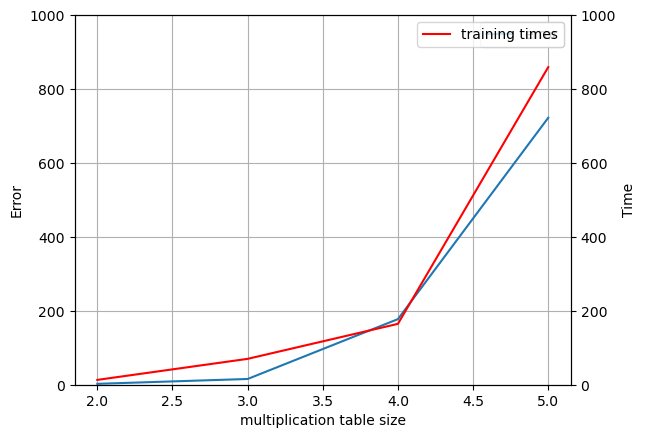

TypeError: 'float' object is not subscriptable

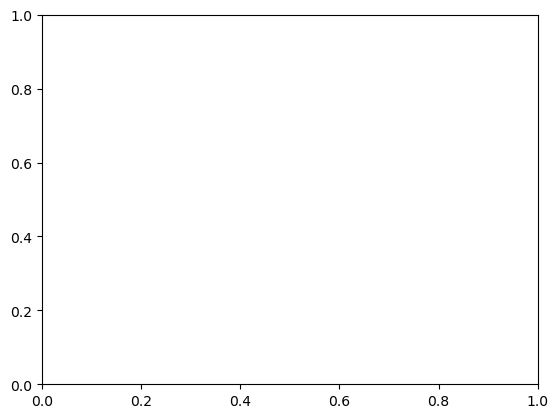

In [19]:
fig = plt.figure()
x = np.arange(2, 6, 1)
# Plotting dataset_2
ax = fig.add_subplot(111)
errors = [t[0] for t in times]
times = [t[1] for t in times]

ax.plot(x, errors, '-', label='error')

# Creating Twin axes for dataset_1
ax2 = ax.twinx()
ax2.plot(x, times, '-r', label='training times')

ax.legend(loc=0)
ax2.legend(loc=0)

ax.grid()

ax.set_xlabel("multiplication table size")
ax.set_ylabel(r"Error")
ax2.set_ylabel(r"Time")

# Setting Y limits
ax.set_ylim(0, 1000)
ax2.set_ylim(0, 1000)

# Show plot
plt.show()


In [17]:
times

[13.085502862930298, 70.00103116035461, 164.71398448944092, 859.272497177124]

In [18]:
errors

[2.4176671861130474, 15.532219439060645, 177.47042229645365, 722.2657964940752]